In [4]:
#Import the libraries needed
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#Read Lottery csv
powerBall = pd.read_csv('./Lottery_Powerball_Winning_Numbers__Beginning_2010.csv', parse_dates=['Draw Date'])

In [6]:
#check result
powerBall

,Draw Date,Winning Numbers,Multiplier
0,2020-09-26,11 21 27 36 62 24,3.0
1,2020-09-30,14 18 36 49 67 18,2.0
2,2020-10-03,18 31 36 43 47 20,2.0
3,2020-10-07,06 24 30 53 56 19,2.0
4,2020-10-10,05 18 23 40 50 18,3.0
...,...,...,...
1424,2023-01-30,01 04 12 36 49 05,2.0
1425,2023-02-01,31 43 58 59 66 09,2.0
1426,2023-02-04,02 08 15 19 58 10,2.0
1427,2023-02-06,05 11 22 23 69 07,2.0


In [7]:
# Convert Winning Numbers to individual columns
powerBall[['num1', 'num2','num3', 'num4','num5', 'num6']] = powerBall['Winning Numbers'].str.split(' ', expand=True)
powerBall

,Draw Date,Winning Numbers,Multiplier,num1,num2,num3,num4,num5,num6
0,2020-09-26,11 21 27 36 62 24,3.0,11,21,27,36,62,24
1,2020-09-30,14 18 36 49 67 18,2.0,14,18,36,49,67,18
2,2020-10-03,18 31 36 43 47 20,2.0,18,31,36,43,47,20
3,2020-10-07,06 24 30 53 56 19,2.0,06,24,30,53,56,19
4,2020-10-10,05 18 23 40 50 18,3.0,05,18,23,40,50,18
...,...,...,...,...,...,...,...,...,...
1424,2023-01-30,01 04 12 36 49 05,2.0,01,04,12,36,49,05
1425,2023-02-01,31 43 58 59 66 09,2.0,31,43,58,59,66,09
1426,2023-02-04,02 08 15 19 58 10,2.0,02,08,15,19,58,10
1427,2023-02-06,05 11 22 23 69 07,2.0,05,11,22,23,69,07


In [8]:
# Cast the number columns as type integer
powerBall = powerBall.astype({
    'num1': 'Int64',
    'num2': 'Int64',
    'num3': 'Int64',
    'num4': 'Int64',
    'num5': 'Int64',
    'num6': 'Int64',
})
powerBall.dtypes


Draw Date          datetime64[ns]
Winning Numbers            object
Multiplier                float64
num1                        Int64
num2                        Int64
num3                        Int64
num4                        Int64
num5                        Int64
num6                        Int64
dtype: object

In [12]:
# Most common Multiplier
mult = powerBall['Multiplier'].value_counts()

<Axes: xlabel='Multiplier'>

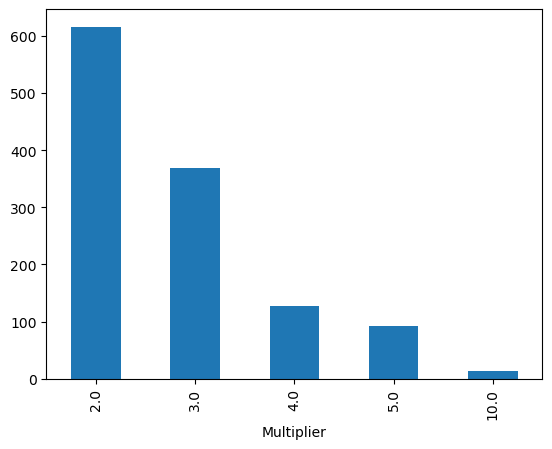

In [16]:
mult.plot(kind='bar')

In [27]:
# Month with them most x10 multiplier
# add a month column to the dataframe
powerBall['Month'] = powerBall['Draw Date'].dt.month
powerBall

,Draw Date,Winning Numbers,Multiplier,num1,num2,num3,num4,num5,num6,Month
0,2020-09-26,11 21 27 36 62 24,3.0,11,21,27,36,62,24,9
1,2020-09-30,14 18 36 49 67 18,2.0,14,18,36,49,67,18,9
2,2020-10-03,18 31 36 43 47 20,2.0,18,31,36,43,47,20,10
3,2020-10-07,06 24 30 53 56 19,2.0,6,24,30,53,56,19,10
4,2020-10-10,05 18 23 40 50 18,3.0,5,18,23,40,50,18,10
...,...,...,...,...,...,...,...,...,...,...
1424,2023-01-30,01 04 12 36 49 05,2.0,1,4,12,36,49,5,1
1425,2023-02-01,31 43 58 59 66 09,2.0,31,43,58,59,66,9,2
1426,2023-02-04,02 08 15 19 58 10,2.0,2,8,15,19,58,10,2
1427,2023-02-06,05 11 22 23 69 07,2.0,5,11,22,23,69,7,2


<Axes: xlabel='Month'>

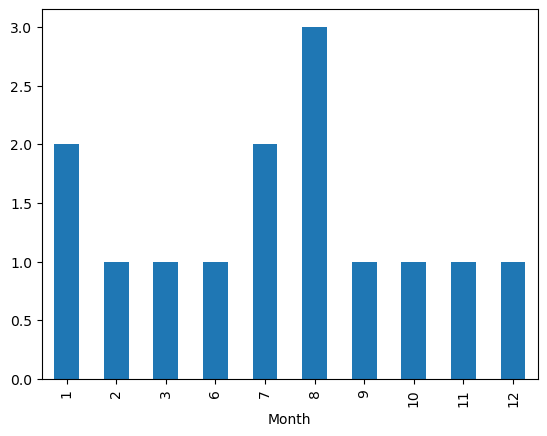

In [47]:
powerBall[powerBall['Multiplier'] == 10]['Month'].value_counts().sort_index().plot(kind='bar')

In [54]:
# Most common numbers on a given Day
powerBall['Day of Week'] = powerBall['Draw Date'].dt.weekday
powerBall

,Draw Date,Winning Numbers,Multiplier,num1,num2,num3,num4,num5,num6,Month,Day,Day of Week
0,2020-09-26,11 21 27 36 62 24,3.0,11,21,27,36,62,24,9,26,5
1,2020-09-30,14 18 36 49 67 18,2.0,14,18,36,49,67,18,9,30,2
2,2020-10-03,18 31 36 43 47 20,2.0,18,31,36,43,47,20,10,3,5
3,2020-10-07,06 24 30 53 56 19,2.0,6,24,30,53,56,19,10,7,2
4,2020-10-10,05 18 23 40 50 18,3.0,5,18,23,40,50,18,10,10,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1424,2023-01-30,01 04 12 36 49 05,2.0,1,4,12,36,49,5,1,30,0
1425,2023-02-01,31 43 58 59 66 09,2.0,31,43,58,59,66,9,2,1,2
1426,2023-02-04,02 08 15 19 58 10,2.0,2,8,15,19,58,10,2,4,5
1427,2023-02-06,05 11 22 23 69 07,2.0,5,11,22,23,69,7,2,6,0


In [ ]:
# Most common numbers by Year / month